# Crossvalidation

In [166]:
 # importando las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#modelo
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

# para crosvalidation
from sklearn.model_selection import cross_val_score

# Seleccion de model0o 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve

# ensamble
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#curva de Aprendizaje
from sklearn.model_selection import learning_curve

# Para dividir los datos
from sklearn.model_selection import train_test_split

# para visualizacion de grafos
import graphviz
from sklearn.tree import export_graphviz

In [103]:
# Indicar que la renderizacion de los graficos sea en el notebook
%matplotlib inline

# Establecer eltilo visual de los graficos
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style='darkgrid')

In [104]:
# cargar datos 
X = pd.read_csv('../data/processed/final_movies_imputados_df.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [105]:
scores = cross_val_score(Lasso(max_iter=100000), X, y, cv=5, scoring='r2')
scores

array([ 0.338918  ,  0.04043975,  0.01982357, -0.12980971, -1.37730718])

In [106]:
scores.mean()

-0.2215871128711206

Este puede tomarse como un valor mas cercano a la realidad. OSea, el modelo no esta sirviendo ni un poquito. 

In [107]:
# Ahora apliquemops lo mismo a un dataset con mejores features
# cargar datos 
X = pd.read_csv('../data/raw/X_opening.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

scores = cross_val_score(Lasso(max_iter=100000), X, y, cv=5, scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

In [108]:
scores.mean()

0.44964021745791777

No es perfecto, pero es una mejora sustancial. 
Los nuevos datos a;aden informacion sobre las ventas en elo primer finm de semana y la cantidad de pantallas en las que se expuso. 

Datos de vital importancia en la industria del cine. 

# Seleccionando un nuevo modelo 

In [109]:
resultados = cross_validate(Lasso(max_iter=100000), X, y, return_train_score=True, cv=5)
resultados

{'fit_time': array([0.00350904, 0.08903694, 0.0507431 , 0.01918268, 0.02149677]),
 'score_time': array([0.00088596, 0.00071192, 0.00068188, 0.0005393 , 0.00042701]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [110]:
test_scores = resultados['test_score']
train_scores = resultados['train_score']
print(train_scores.mean())
print(test_scores.mean())

0.7491178363039036
0.44964021745791777


In [111]:
print(train_scores.mean())
print(test_scores.mean())

0.7491178363039036
0.44964021745791777


In [112]:
# Aplicando el otro modelo 
cross_validate(KNeighborsRegressor(), X, y, return_train_score=True, cv=5)

{'fit_time': array([0.00532198, 0.000808  , 0.00075102, 0.00236201, 0.00079513]),
 'score_time': array([0.00146699, 0.00150013, 0.00165081, 0.00421619, 0.00123072]),
 'test_score': array([0.3647382 , 0.59274527, 0.21545625, 0.15143495, 0.25635077]),
 'train_score': array([0.73553883, 0.78647652, 0.78386739, 0.77876542, 0.77477287])}

In [113]:
n_vecinos = np.arange(2, 50, 2)

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, 
                                             param_name='n_neighbors', param_range=n_vecinos, cv=5)

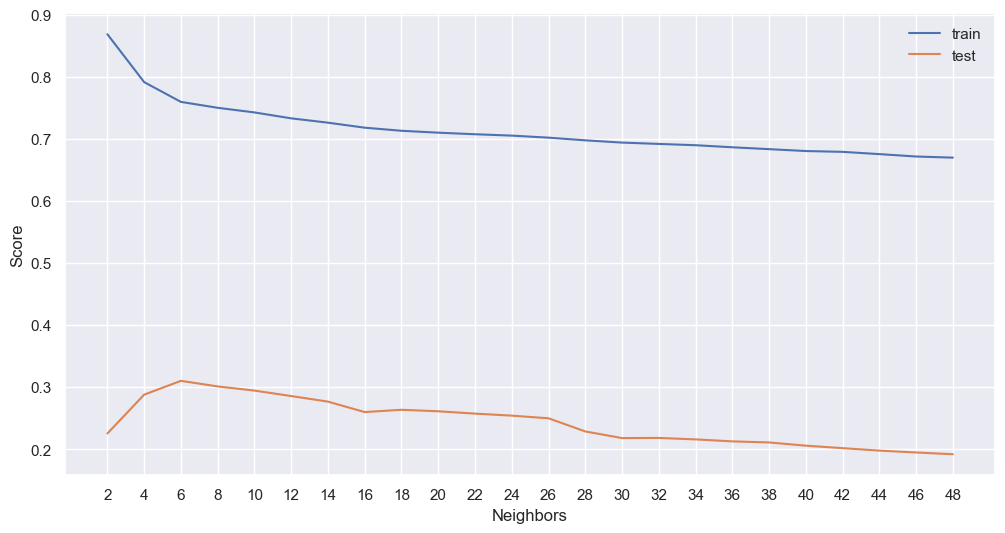

In [119]:
plt.figure(figsize=(12, 6))
sns.lineplot(np.mean(train_scores, axis=1), label='train') 
sns.lineplot(np.mean(test_scores, axis=1), label='test') 
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.xticks(np.arange(24), n_vecinos);

# Curva de Aprendizaje

In [122]:
# Elegimos 6 vecinos, basado en le grafico anterior
lc = learning_curve(KNeighborsRegressor(n_neighbors=6), X, y, cv=5)
samples, train, test = lc[0], lc[1], lc[2]

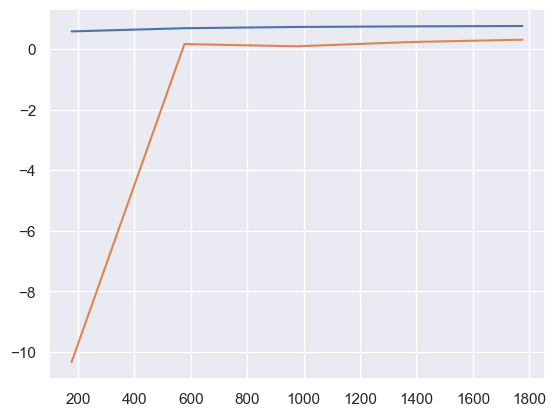

In [124]:
plt.plot(samples, np.mean(train, axis=1))
plt.plot(samples, np.mean(test, axis=1))

(-0.2, 1.0)

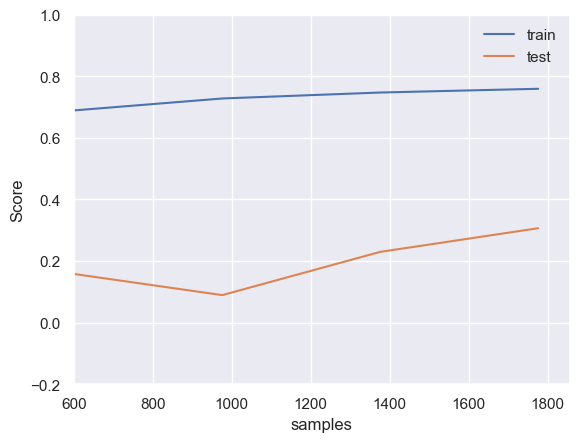

In [136]:
sns.lineplot(x=samples, y=np.mean(train, axis=1), label='train')
sns.lineplot(x=samples, y=np.mean(test, axis=1), label='test')
plt.xlabel('samples')
plt.ylabel('Score')
plt.xlim(600)
plt.ylim(-0.2, 1)